# Visualize famous formulas

The idea came from the following post on x:

https://x.com/DailyDoseOfDS_/status/1872941140430995882

## Imports

In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

## Plot settings

In [2]:
# Add system fonts for Matplotlib to see them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

In [3]:
plt.rcParams.update(
    {
        "font.family": "Roboto",
        "font.size": 18,
        "mathtext.fontset": "cm",
        "axes.spines.left": False,
        "axes.spines.right": False,
        "axes.titlelocation": "left",
        "axes.titlepad": 40,
        # "ytick.left": False,
        # "text.color": "#5e5c64",
        # "axes.labelcolor": "#5e5c64", 
        # "xtick.color": "#5e5c64",
        # "ytick.color": "#5e5c64"
    }
)

## Data

I've downloaded the image and fed to to Grok to extract the formulas and save them directly in a `Latex` format.

In [4]:
equations_data = [
    {
        "formula_name": "Pythagoras's Theorem",
        "formula": "a^2 + b^2 = c^2",
        "founder": "Pythagoras",
        "year": "530 BC"
    },
    {
        "formula_name": "Logarithms",
        "formula": "\\log(xy) = \\log(x) + \\log(y)",
        "founder": "John Napier",
        "year": "1610"
    },
    {
        "formula_name": "Calculus",
        "formula": "\\frac{df}{dx} = \\lim_{h \\to 0} \\frac{f(x + h) - f(x)}{h}",
        "founder": "Newton",
        "year": "1668"
    },
    {
        "formula_name": "Law of Gravity",
        "formula": "F = G \\frac{m_1 m_2}{d^2}",
        "founder": "Newton",
        "year": "1687"
    },
    {
        "formula_name": "The Square Root of Minus One",
        "formula": "i^2 = -1",
        "founder": "Euler",
        "year": "1750"
    },
    {
        "formula_name": "Euler's Formula for Polyhedra",
        "formula": "F - E + V = 2",
        "founder": "Euler",
        "year": "1750"
    },
    {
        "formula_name": "Normal Distribution",
        "formula": "\\Phi(x) = \\frac{1}{\\sqrt{2\\pi}\\sigma} e^{-\\frac{(x - \\mu)^2}{2\\sigma^2}}",
        "founder": "C.F. Gauss",
        "year": "1810"
    },
    {
        "formula_name": "Wave Equation",
        "formula": "\\frac{\\partial^2 u}{\\partial t^2} = c^2 \\frac{\\partial^2 u}{\\partial x^2}",
        "founder": "J. d'Alembert",
        "year": "1746"
    },
    {
        "formula_name": "Fourier Transform",
        "formula": "\\hat{f}(\\xi) = \\int_{-\\infty}^{\\infty} f(x) e^{-2\\pi i x \\xi} dx",
        "founder": "J. Fourier",
        "year": "1822"
    },
    {
        "formula_name": "Navier-Stokes Equations",
        "formula": "\\rho \\left( \\frac{\\partial \\mathbf{v}}{\\partial t} + \\mathbf{v} \\cdot \\nabla \\mathbf{v} \\right) = - \\nabla P + \\nabla \\cdot \\mathbf{T} + \\mathbf{f}",
        "founder": "C. Navier, G. Stokes",
        "year": "1845"
    },
    {
        "formula_name": "Maxwell's Equations",
        "formula": "\\nabla \\cdot \\mathbf{E} = \\frac{\\rho}{\\epsilon_0}, \\nabla \\times \\mathbf{E} = -\\frac{\\partial \\mathbf{B}}{\\partial t}, \\nabla \\cdot \\mathbf{H} = 0, \\nabla \\times \\mathbf{H} = \\mathbf{J} + \\frac{\\partial \\mathbf{D}}{\\partial t}",
        "founder": "J.C Maxwell",
        "year": "1865"
    },
    {
        "formula_name": "Second Law of Thermodynamics",
        "formula": "dS \\gg 0",
        "founder": "L. Boltzmann",
        "year": "1874"
    },
    {
        "formula_name": "Relativity",
        "formula": "E = mc^2",
        "founder": "Einstein",
        "year": "1905"
    },
    {
        "formula_name": "Schrodinger's Equation",
        "formula": "i \\hbar \\frac{\\partial \\Psi}{\\partial t} = \\hat{H} \\Psi",
        "founder": "E. Schrodinger",
        "year": "1927"
    },
    {
        "formula_name": "Information Theory",
        "formula": "H = - \\sum p(x) \\log p(x)",
        "founder": "C. Shannon",
        "year": "1949"
    },
    {
        "formula_name": "Chaos Theory",
        "formula": "X_{t+1} = kX_t (1 - X_t)",
        "founder": "Robert May",
        "year": "1975"
    },
    {
        "formula_name": "Black-Scholes Equation",
        "formula": "\\frac{1}{2} \\sigma^2 S^2 \\frac{\\partial^2 V}{\\partial S^2} + rS \\frac{\\partial V}{\\partial S} + \\frac{\\partial V}{\\partial t} - rV = 0",
        "founder": "F. Black, M. Scholes",
        "year": "1990"
    }
]

### Convert data to `DataFrame`

In [5]:
df = pd.DataFrame(
    equations_data
)

df

,formula_name,formula,founder,year
0,Pythagoras's Theorem,a^2 + b^2 = c^2,Pythagoras,530 BC
1,Logarithms,\log(xy) = \log(x) + \log(y),John Napier,1610
2,Calculus,\frac{df}{dx} = \lim_{h \to 0} \frac{f(x + h) ...,Newton,1668
3,Law of Gravity,F = G \frac{m_1 m_2}{d^2},Newton,1687
4,The Square Root of Minus One,i^2 = -1,Euler,1750
5,Euler's Formula for Polyhedra,F - E + V = 2,Euler,1750
6,Normal Distribution,\Phi(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\fra...,C.F. Gauss,1810
7,Wave Equation,\frac{\partial^2 u}{\partial t^2} = c^2 \frac{...,J. d'Alembert,1746
8,Fourier Transform,\hat{f}(\xi) = \int_{-\infty}^{\infty} f(x) e^...,J. Fourier,1822
9,Navier-Stokes Equations,\rho \left( \frac{\partial \mathbf{v}}{\partia...,"C. Navier, G. Stokes",1845


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   formula_name  17 non-null     object
 1   formula       17 non-null     object
 2   founder       17 non-null     object
 3   year          17 non-null     object
dtypes: object(4)
memory usage: 676.0+ bytes


### Get year values

All dates are currently stored as strings. On top of that, Python doesn't understand BC/AD distinction. So I had to store years as `Int`, using negative values for *BC*

In [7]:
def get_year_values(date: str):
    if "bc" in date.lower():
        date = f"-{date.lower().replace("bc", "")}"
    
    return int(date.strip())

In [8]:
df["year_value"] = df["year"].apply(get_year_values)
df

,formula_name,formula,founder,year,year_value
0,Pythagoras's Theorem,a^2 + b^2 = c^2,Pythagoras,530 BC,-530
1,Logarithms,\log(xy) = \log(x) + \log(y),John Napier,1610,1610
2,Calculus,\frac{df}{dx} = \lim_{h \to 0} \frac{f(x + h) ...,Newton,1668,1668
3,Law of Gravity,F = G \frac{m_1 m_2}{d^2},Newton,1687,1687
4,The Square Root of Minus One,i^2 = -1,Euler,1750,1750
5,Euler's Formula for Polyhedra,F - E + V = 2,Euler,1750,1750
6,Normal Distribution,\Phi(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\fra...,C.F. Gauss,1810,1810
7,Wave Equation,\frac{\partial^2 u}{\partial t^2} = c^2 \frac{...,J. d'Alembert,1746,1746
8,Fourier Transform,\hat{f}(\xi) = \int_{-\infty}^{\infty} f(x) e^...,J. Fourier,1822,1822
9,Navier-Stokes Equations,\rho \left( \frac{\partial \mathbf{v}}{\partia...,"C. Navier, G. Stokes",1845,1845


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   formula_name  17 non-null     object
 1   formula       17 non-null     object
 2   founder       17 non-null     object
 3   year          17 non-null     object
 4   year_value    17 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 812.0+ bytes


### Sort by `year_value`.

I've noticed the original data wasn't sorted by the year. Fixed it.

In [10]:
df = (
    df
    .sort_values(by="year_value")
    .reset_index(drop=True)
)

df

,formula_name,formula,founder,year,year_value
0,Pythagoras's Theorem,a^2 + b^2 = c^2,Pythagoras,530 BC,-530
1,Logarithms,\log(xy) = \log(x) + \log(y),John Napier,1610,1610
2,Calculus,\frac{df}{dx} = \lim_{h \to 0} \frac{f(x + h) ...,Newton,1668,1668
3,Law of Gravity,F = G \frac{m_1 m_2}{d^2},Newton,1687,1687
4,Wave Equation,\frac{\partial^2 u}{\partial t^2} = c^2 \frac{...,J. d'Alembert,1746,1746
5,The Square Root of Minus One,i^2 = -1,Euler,1750,1750
6,Euler's Formula for Polyhedra,F - E + V = 2,Euler,1750,1750
7,Normal Distribution,\Phi(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\fra...,C.F. Gauss,1810,1810
8,Fourier Transform,\hat{f}(\xi) = \int_{-\infty}^{\infty} f(x) e^...,J. Fourier,1822,1822
9,Navier-Stokes Equations,\rho \left( \frac{\partial \mathbf{v}}{\partia...,"C. Navier, G. Stokes",1845,1845


## Plot

### Common settings

Colors, sizes, etc.

In [11]:
formula_size = 13
color_blue = "mediumblue"
light_bg = "#f7f5f5"
color_line = "black"

### First plot

Here I was trying to come up with an automatic way to distribute the formulas.

I tried linear and exponential leaders lengths but in each case the formulas would overlap.

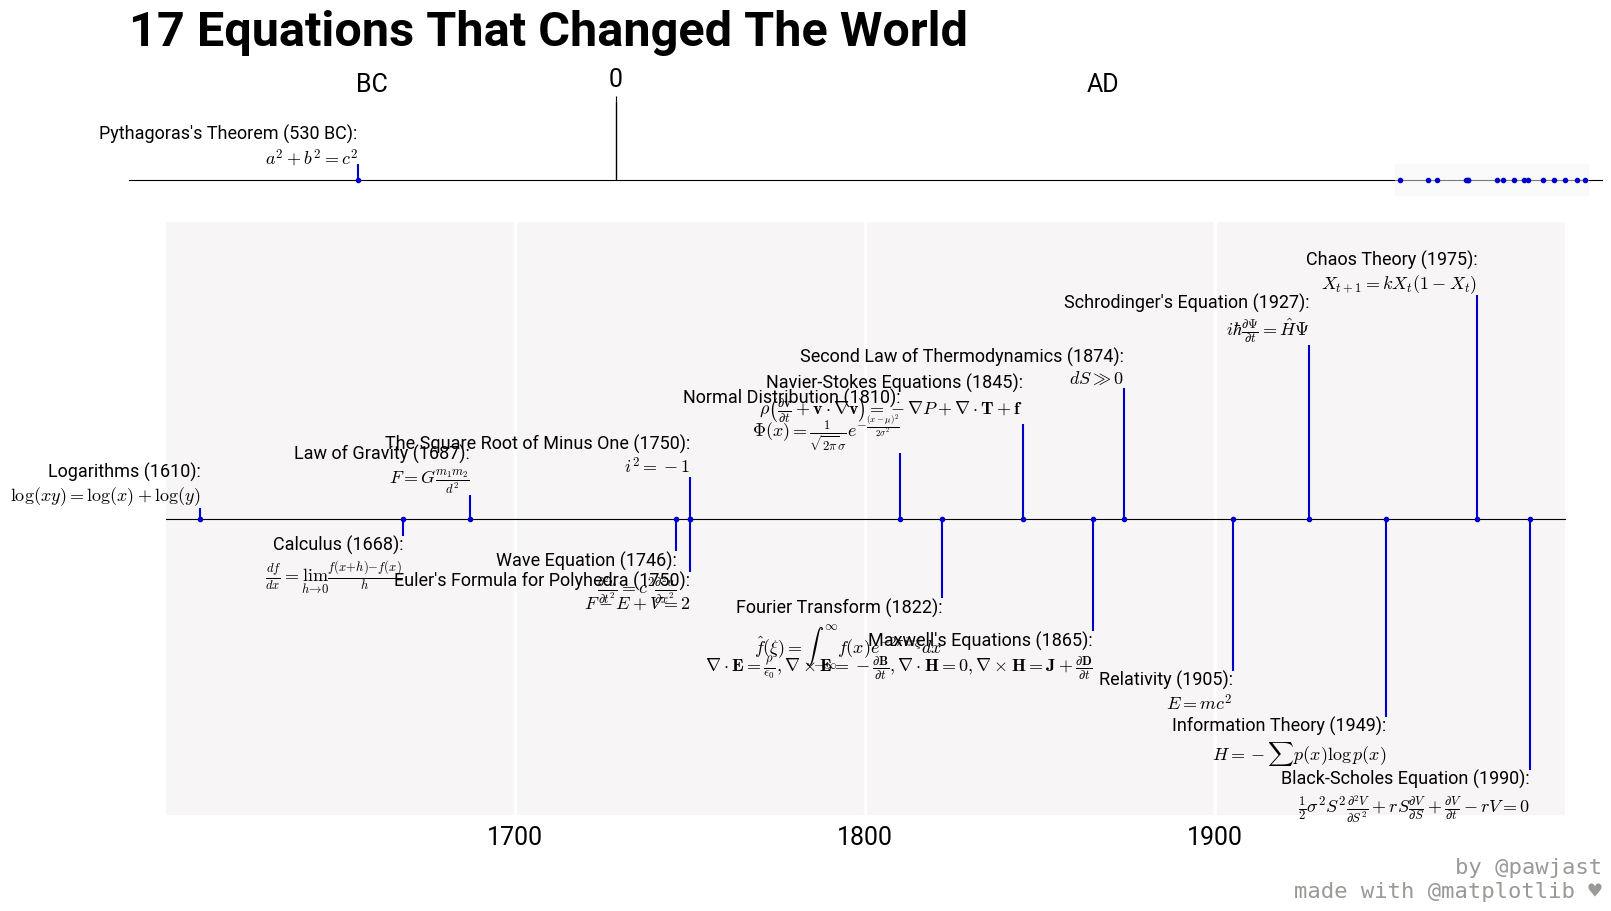

In [12]:
fig, ax = plt.subplots(
    figsize=(16,9),
    layout="constrained",
    facecolor="white"
)

ax.set_title(
    "17 Equations That Changed The World",
    fontsize=35,
    weight="bold"
)

# Set main ax limits
ax.set_xlim(-1000, 2025)
ax.set_ylim(-4, 0.5)
ax.set_xticks(
    ticks = [0],
    labels = ["0"]
)
ax.set_xticks(
    ticks = [-500, 1000],
    labels = ["BC", "AD"],
    minor=True
)
ax.tick_params(
    axis="x",
    which="minor",
    length=0
)
ax.tick_params(
    axis="y",
    left=False,
    labelleft=False
)
# I want there the be only one grid line at main axis at 0 point so I use plotting line function for it
ax.vlines(
    x=0,
    ymin=0,
    ymax=0.5,
    color=color_line,
    lw=1
)

# Move top spine to the center
ax.spines["bottom"].set_position("zero")
# Move xaxis ticks and labels to the top
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
ax.spines["top"].set_visible(False)


# ------------------
# ---- INSET AX ----
# ------------------
# Add inset ax

inset_x_bounds = (1600, 2000)

axins = ax.inset_axes(
    [0.025, 0, 0.95, 0.83],
    xlim=inset_x_bounds,
    facecolor=light_bg
)

# Move the top spine to the zero location
axins.spines["top"].set_position("zero")
# Hide the bottom spine
axins.spines["bottom"].set_visible(False)
# Remove xticks, yticks and ylabels
axins.tick_params(
    bottom=False,
    left=False,
    labelleft=False
)

# Set xlabels
axins.set_xticks(
    ticks=range(1700, 2000, 100)
)
# Add grid
axins.grid(
    axis="x",
    color="white",
    lw=2.5
)

# ---------------------
# ---- Plot points ----
# ---------------------
for a in [ax, axins]:
    a.plot(
        df["year_value"], np.zeros(len(df)),
        lw=0,
        marker=".",
        color=color_blue,
        zorder=100
    )

# ---------------------------------------------
# ---- ADD LABEL AND LINE TO THE MAIN PLOT ----
# ---------------------------------------------
y_offset = 0.1  # this is the leader length as well
ax.text(
    df.iloc[0]["year_value"],
    y_offset,
    s=f"{df.iloc[0]["formula_name"]} ({df.iloc[0]["year"]}):\n${df.iloc[0]["formula"]}$",
    fontdict={
        "size": formula_size,
        "ha": "right"
    }
)
ax.vlines(
    x = df["year_value"].iloc[0],
    ymin= 0,
    ymax= y_offset,
    color=color_blue
)


# Calculate lengths of the leaders to the equations
# Make the leaders grow exponentially
lengths = [x**2.25 for x in range(1+4, len(df.loc[1:])+1+4)]
# Then turn every other element negative
lengths = [x if i % 2 == 0 else -x for i, x in enumerate(lengths)]

# y limit rounded to the nearest 200
y_lim_val = math.ceil(abs(lengths[-1]/200)) * 200
axins.set_ylim(-y_lim_val, y_lim_val)


# Add to the main ax an indication of where the inset is coming from
ax.indicate_inset(
    bounds=[
        inset_x_bounds[0],  # x
        -0.1,  # y
        inset_x_bounds[1] - inset_x_bounds[0],  # width
        0.2  # height
    ],
    edgecolor=None,
    facecolor=light_bg
)

# Plot leaders in the inset plot
axins.vlines(
    x = df["year_value"].iloc[1:],
    ymin= 0,
    ymax= lengths,
    color=color_blue
)

# Plot equations in the inset plot
for row, length in zip(df.iloc[1:].itertuples(), lengths):
    # Let's have different alignment settings for positive and negative values
    if length > 0:
        va_val = "bottom"
    else:
        va_val = "top"

    axins.text(
        row.year_value,
        length,
        s=f"{row.formula_name} ({row.year}):\n${row.formula}$",
        fontdict={
            "size": formula_size,
            "ha": "right",
            "va": va_val
        }
    )

ax.text(
    1, -0.12,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
);

## Plot with manual layout of the points

The automatic leaders weren't working for this dataset so I had to manually provide an array of lengths that shows all of the formulas without overlapping.

This is the only difference between this plot and the previous one.

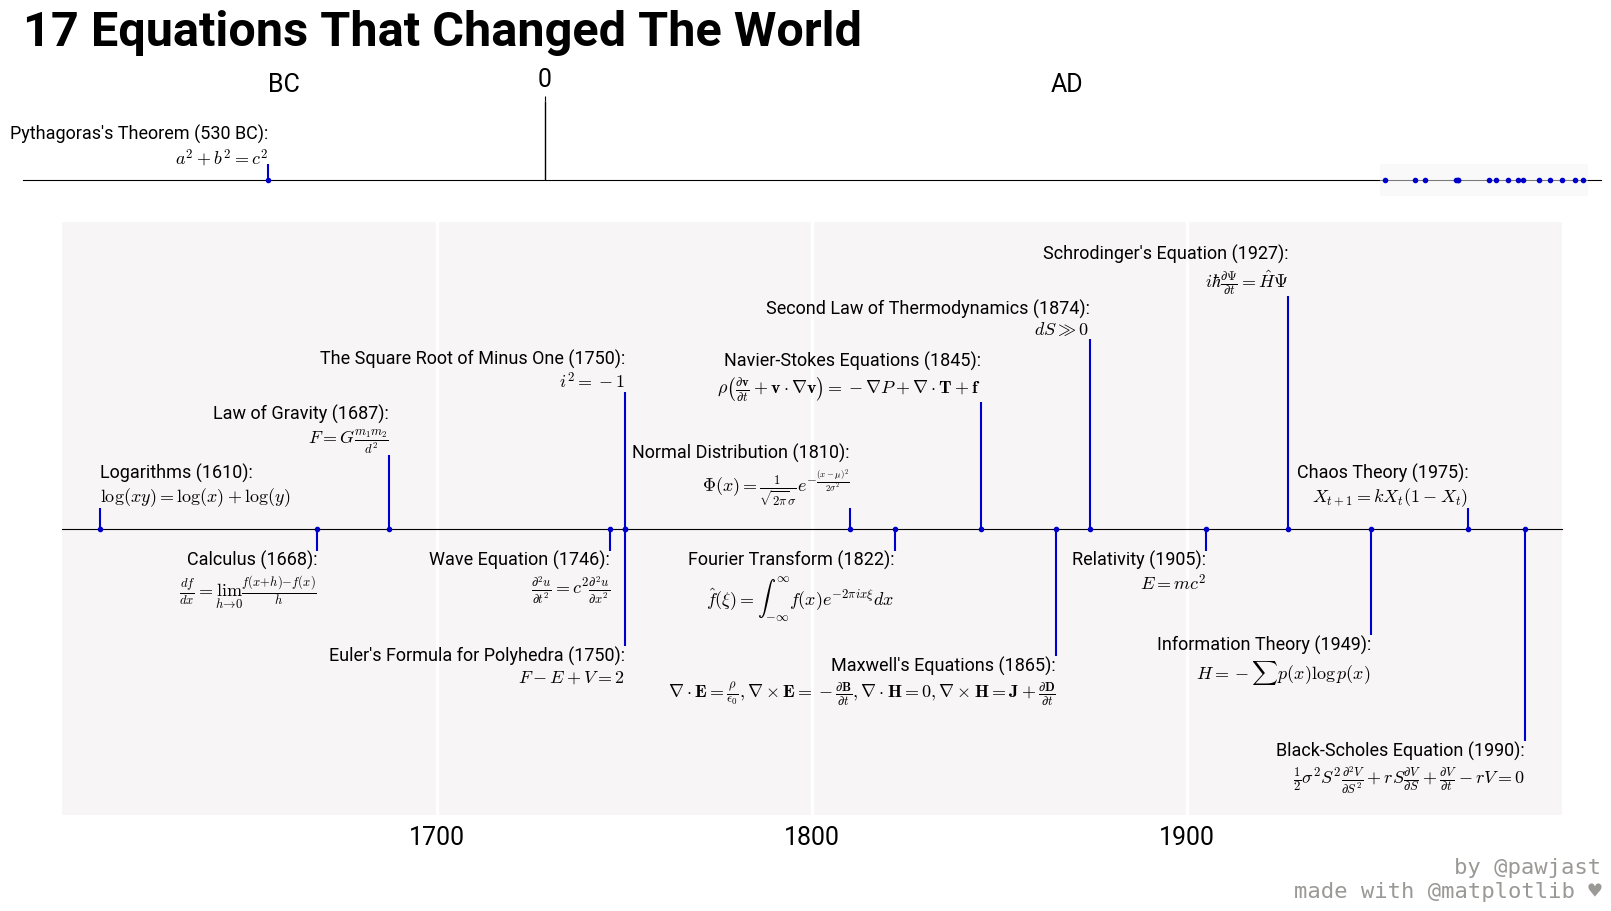

In [67]:
fig, ax = plt.subplots(
    figsize=(16,9),
    layout="constrained",
    facecolor="white"
)

ax.set_title(
    "17 Equations That Changed The World",
    fontsize=35,
    weight="bold"
)

# Set main ax limits
ax.set_xlim(-1000, 2025)
ax.set_ylim(-4, 0.5)
ax.set_xticks(
    ticks = [0],
    labels = ["0"]
)
ax.set_xticks(
    ticks = [-500, 1000],
    labels = ["BC", "AD"],
    minor=True
)
ax.tick_params(
    axis="x",
    which="minor",
    length=0
)
ax.tick_params(
    axis="y",
    left=False,
    labelleft=False
)
# I want there the be only one grid line at main axis at 0 point so I use plotting line function for it
ax.vlines(
    x=0,
    ymin=0,
    ymax=0.5,
    color=color_line,
    lw=1
)

# Move top spine to the center
ax.spines["bottom"].set_position("zero")
# Move xaxis ticks and labels to the top
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
ax.spines["top"].set_visible(False)


# ------------------
# ---- INSET AX ----
# ------------------
# Add inset ax

inset_x_bounds = (1600, 2000)

axins = ax.inset_axes(
    [0.025, 0, 0.95, 0.83],
    xlim=inset_x_bounds,
    facecolor=light_bg
)

# Move the top spine to the zero location
axins.spines["top"].set_position("zero")
# Hide the bottom spine
axins.spines["bottom"].set_visible(False)
# Remove xticks
axins.tick_params(
    bottom=False,
    left=False,
    labelleft=False
)

# Set xlabels
axins.set_xticks(
    ticks=range(1700, 2000, 100)
)
# Add grid
axins.grid(
    axis="x",
    color="white",
    lw=2.5
)

# ---------------------
# ---- Plot points ----
# ---------------------
for a in [ax, axins]:
    a.plot(
        df["year_value"], np.zeros(len(df)),
        lw=0,
        marker=".",
        color=color_blue,
        zorder=100
    )

# ---------------------------------------------
# ---- ADD LABEL AND LINE TO THE MAIN PLOT ----
# ---------------------------------------------
y_offset = 0.1
ax.text(
    df.iloc[0]["year_value"],
    y_offset,
    s=f"{df.iloc[0]["formula_name"]} ({df.iloc[0]["year"]}):\n${df.iloc[0]["formula"]}$",
    fontdict={
        "size": formula_size,
        "ha": "right"
    }
)
ax.vlines(
    x = df["year_value"].iloc[0],
    ymin= 0,
    ymax= y_offset,
    color=color_blue
)


# Set the lengths of the leaders manually
lengths = [2, -2, 7, -2, 13, -11, 2, -2, 12, -12, 18, -2, 22, -10, 2, -20]
axins.set_ylim(-27, 29)

ax.indicate_inset(
    bounds=[
        inset_x_bounds[0],  # x
        -0.1,  # y
        inset_x_bounds[1] - inset_x_bounds[0],  # width
        0.2  # height
    ],
    edgecolor=None,
    facecolor=light_bg
)

# Plot leaders
axins.vlines(
    x = df["year_value"].iloc[1:],
    ymin= 0,
    ymax= lengths,
    color=color_blue
)

# Plot equations in the inset
for row, length in zip(df.iloc[1:].itertuples(), lengths):
    # Let's have different alignment settings for positive and negative values
    if row.Index == 1:
        ha_val = "left"
    else:
        ha_val = "right"

    if length > 0:
        va_val = "bottom"
    else:
        va_val = "top"

    axins.text(
        row.year_value,
        length,
        s=f"{row.formula_name} ({row.year}):\n${row.formula}$",
        fontdict={
            "size": formula_size,
            "ha": ha_val,
            "va": va_val
        }
    )

ax.text(
    1, -0.12,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
);